# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [1]:
# import everything we need
import numpy as np
import pandas as pd

In [ ]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [ ]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above
df = pd.read_csv('boston.csv')
print(df.shape) # Just to check the dimensions of the data
df.head() # show the first 5 rows


(506, 15)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Model Training

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
x = df[['LSTAT']] 
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# We need 2D arrays for x_train 
print(x_train.shape)
print(x_train.head())

(404, 1)
     LSTAT
477  24.91
15    8.47
332   7.83
423  23.29
19   11.28


In [9]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept# import model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

In [10]:
# fit out linear model to the train set data
linReg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [23]:
y_predict = linReg.predict(x_test)
print(y_predict[:5]) # just to show the first 5 predicted values

# To compare with our y_test values
print(y_test.head().values)

[26.09951047 31.42509574 17.37173642 29.50169924 18.14496114]
[23.6 32.4 13.6 22.8 16.1]


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [24]:
# we can see the coefficient and intercept our model finds
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(y_test, y_predict)) 
# Compare the value with linReg.score().  Is the score the same as model.score?
print('score: ',linReg.score(x_test,y_test))


r2_score:  0.5429180422970384
score:  0.5429180422970384


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

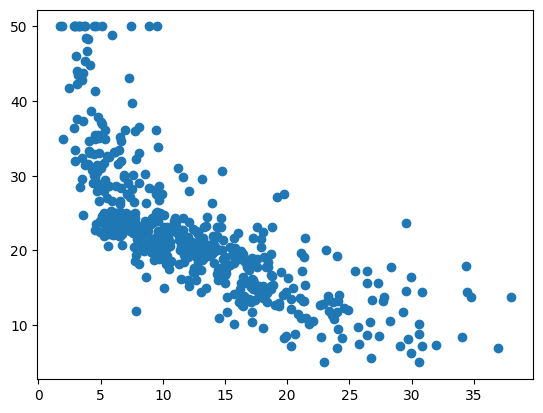

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df.LSTAT, df.MEDV)
plt.show()

Plot the regression line (blue) vs the actual value (red)

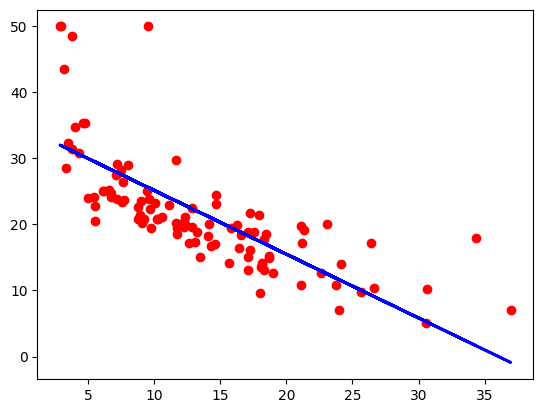

In [27]:
# We want to plot the regression line(blue) vs the actual value(red)
plt.scatter(x_test, y_test, color='red', label='Actual Values (y_test)')

plt.plot(x_test, y_predict, color='blue', linewidth=2, label='Regression Line (y_pred)')